<h1 style = "color: green"> Esercitazione 9 </h1>

<h3 style = "color: blue"> Esercizio 9.1 </h3>

Vogliamo risolvere il problema del commesso viaggiatore ("travelling salesman problem", TSP) tramite un algoritmo genetico.  

Abbiamo due configurazioni: 34 città su una circonferenza ($r=1$) e 34 città dentro un quadrato ($l=1$). L'obiettivo è trovare il cammino che minimizza la distanza percorsa per visitare tutte le città una e una sola volta e tornare a quella di partenza.  
Ovviamente la soluzione è degenere: infatti ogni percorso può partire da qualunque città ed essere percorso nei due sensi. Per ovviare, almeno in parte, a questo problema, fissiamo la città di partenza a quella corrispondente alla prima posizione generata.

Utilizziamo, per i due casi, due diverse funzioni costo per l'algoritmo genetico, che sono le funzioni da minimizzare, cioè la somma delle distanze (non necessariamente euclidea) tra una città e la successiva, nell'ordine in cui sono percorse.  
Consideriamo la circonferenza di raggio $r=1$ come un segmento di lunghezza $2\pi r=2\pi$ in una sola dimensione con le condizioni al contorno periodiche, invece che come una figura bidimensionale. Scegliamo quindi come funzione costo $L^{(1)}(x_1, x_2, \dots, x_N) = \sum_{i=1}^{N} |x_i-x_{i+1}|$, dove le $x_i$ sono gli angoli corrinspondenti al punto dove si trova la città (in 1D corrisponde alla distanza euclidea). Per questo caso conosciamo la soluzione esatta: è quella di percorrere tutta la circonferenza in uno dei due versi; il minimo è $L^{(1)}=2\pi$ (a meno che le città non siano tutte su una semicirconferenza, ma generandole casualmente questa situazione è improbabile per 34 città).  
Per le città nel quadrato usiamo come funzione costo la somma delle distanze al quadrato nel piano, cioè $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2$. In questo caso le $\vec{x}_i$ sono le posizioni delle città nel piano.

L'algoritmo genetico è strutturato nel seguente modo: un "gene" è una città (un intero da 1 a 34), un percorso possibile è rappresentato come un elenco di città, nell'ordine in cui sono visitate. Ogni percorso è un "cromosoma". Creiamo quindi una popolazione di $M$ cromosomi e agiamo su di essa con degli operatori di mutazione e di crossover per un certo numero di generazioni: la mutazione può avvenire scambiando la posizione di due città o di due "blocchi" di città contigue, oppure invertendo o spostando un blocco; il crossover avviene tagliando in due parti due cromosomi e riordinando i geni (le città) della seconda metà di ognuno nell'ordine in cui appaiono nell'altro. La probabilità di ogni mutazione è tra il $5\%$ e il $12\%$, quella di crossover è del $75\%$. La probabilità di mutazione totale è del $34\%$ e ogni cromosoma può subire più tipi di mutazione ogni generazione.  
La "selezione" avviene ordinando la popolazione dal cromosoma con il percorso migliore al peggiore ed estraendo casualmente un cromosoma da passare alla generezione successiva, dando maggior peso ai migliori tramite l'algoritmo $j=int(M \times r^p)$, dove $j$ è l'indice del cromosoma estratto nella popolazione (rappresentata con un vector in C++), $r$ è un numero casuale estratto uniformemente in $[0, 1)$ e $p$ è un numero che, più è alto, più dà peso ai cromosomi migliori. In questo caso abbiamo scelto $p=4$.

<h4> Città su una circonferenza </h4>

Generiamo 34 angoli $\theta \in (0, 2\pi)$ che corrispondono alle posizioni delle città sulla circonferenza unitaria e creiamo una popolazione di $M=1000$ cromosomi, che faremo evolvere per $100$ generazioni. L'algoritmo genetico converge alla soluzione descritta sopra, cioè percorrere un giro completo della circonferenza, come si può vedere dal primo dei grafici sottostanti e dal valore finale di $L^{(1)}=2\pi$.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# we define generic functions for reading files

# reads positions from files [shape]/position.out
def importPositions(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    length = len(lines)

    x, y = np.empty(length), np.empty(length)
    for i in range(length):
        values = lines[i].split()
        x[i], y[i] = float(values[0]), float(values[1])

    dataFile.close()

    return x, y



# import the best candidate found
def importCities(name):
    dataFile = open(name, "r")
    line = dataFile.readlines()
    values = line[0].split()
    length = len(values) - 1

    cities = np.empty(length, dtype = int)
    for i in range(length):
        cities[i] = int(values[i])

    dataFile.close()

    return cities, length



# reads files for the average and best value of L^1 and L^2
def loadFile(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    fileLength = len(lines)
    content = np.empty(fileLength)

    for i in range(fileLength):
        content[i] = float(lines[i])

    dataFile.close()

    return content, fileLength

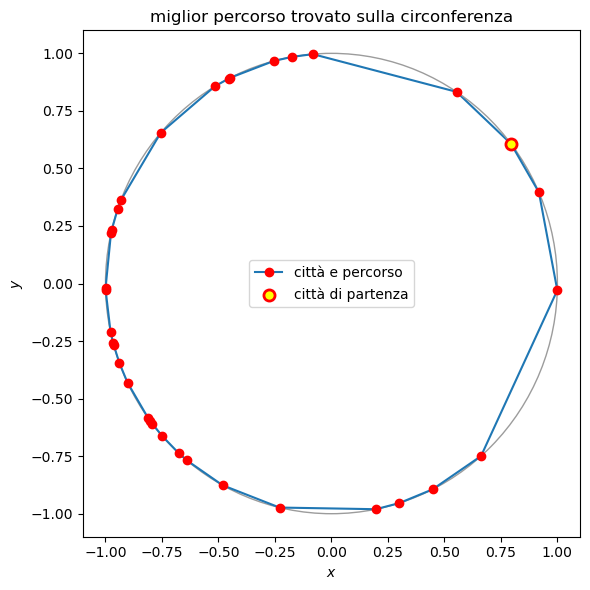

In [7]:
# draw picture of the cities on the circumference

x, y = importPositions("code/circle/positions.out")
cities, nCities = importCities("code/circle/best.out")

xOrder, yOrder = np.empty(nCities), np.empty(nCities)

# orders positions, based on the order of the cities
for i in range(nCities):
    xOrder[i] = x[cities[i] - 1]
    yOrder[i] = y[cities[i] - 1]


fig, ax = plt.subplots(figsize = (6, 6))

circle = plt.Circle((0, 0), 1, fill = False, color = "#9c9c9c")
ax.add_patch(circle)

ax.plot(xOrder, yOrder, "o-", color = "#1f77b4", mfc = "red", mec = "red", label = "città e percorso")

# segment from last city to first
ax.plot([xOrder[nCities - 1], xOrder[0]], [yOrder[nCities - 1], yOrder[0]], zorder = 0)

# make first city stand out
ax.scatter(x[0], y[0], color = "yellow", ec = "red", s = 64, linewidths = 2, zorder = 4, label = "città di partenza")

ax.set(title = "miglior percorso trovato sulla circonferenza", xlabel = "$x$", ylabel = "$y$")


fig.tight_layout()
plt.legend()
plt.show()

Per il percorso migliore trovato L^(1) = 6.28319


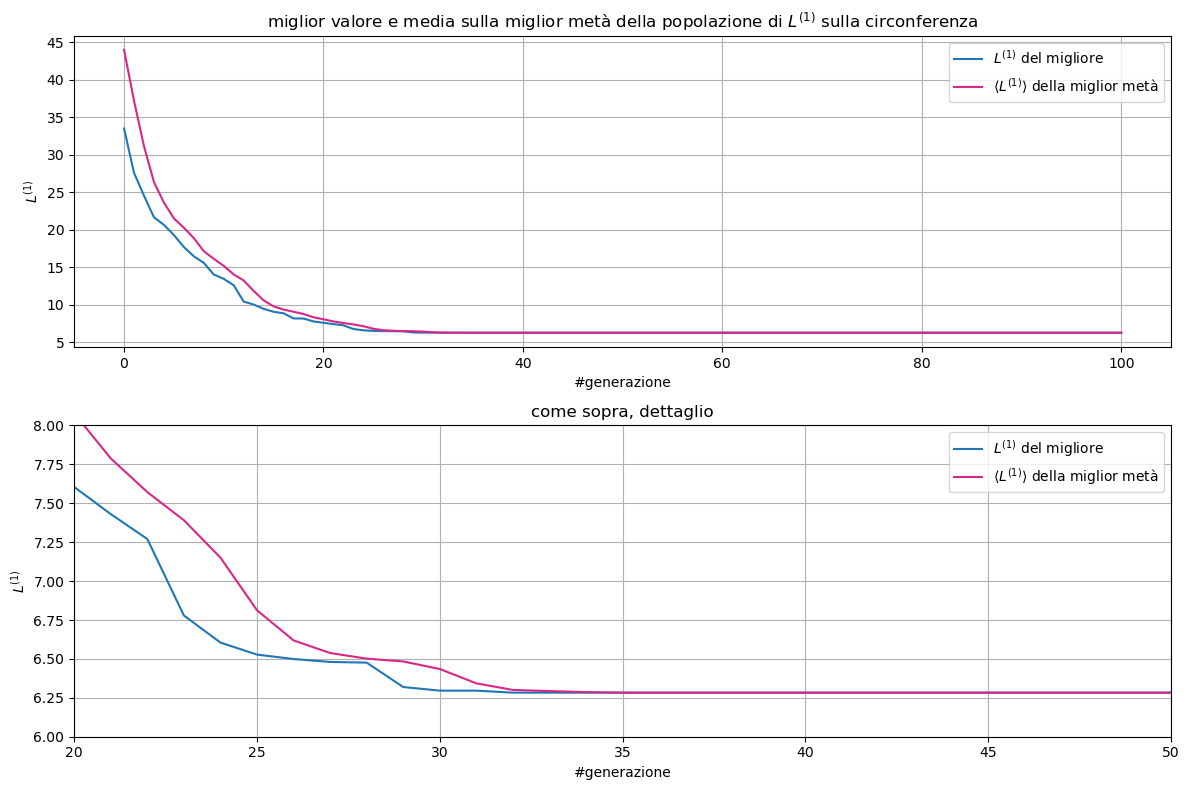

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (12, 8))

# plot best value of L^1 over generations (on ax[1] is the same plot but zoomed in)
best, nGens = loadFile("code/circle/path.out")
x = np.arange(nGens)

ax[0].plot(x, best, label = "$L^{(1)}$ del migliore")
ax[1].plot(x, best, label = "$L^{(1)}$ del migliore")

# plot average value of L^1 on the best half of the populazion over generations (on ax[1] is the same plot but zoomed in)
mean, nGens = loadFile("code/circle/average.out")
ax[0].plot(x, mean, color = "#d82786", label = r"$\langle L^{(1)} \rangle$ della miglior metà")
ax[1].plot(x, mean, color = "#d82786", label = r"$\langle L^{(1)} \rangle$ della miglior metà")

ax[0].set(title = "miglior valore e media sulla miglior metà della popolazione di $L^{(1)}$ sulla circonferenza", xlabel = "#generazione", ylabel = "$L^{(1)}$")
ax[0].legend()
ax[0].grid(True)

# zoom from generation 25
ax[1].set(title = "come sopra, dettaglio", xlabel = "#generazione", ylabel = "$L^{(1)}$", xlim = (20, 50), ylim = (6, 8))
ax[1].legend()
ax[1].grid(True)

print("Per il percorso migliore trovato L^(1) = %.5f" % best[-1])


fig.tight_layout()
plt.show()

Da questi ultimi due grafici, notiamo come l'algoritmo genetico converga rapidamente verso la soluzione $L^{(1)}=2\pi$, raggiungendo questo valore poco dopo la trentesima generazione. La media sulla metà migliore della popolazione converge anch'essa al valore della soluzione, poiché, per come abbiamo costruito l'algoritmo, i cromosomi migliori sono molto favoriti nella selezione e, una volta raggiunto il percorso ottimale, questo cromosoma si "moltiplica" a discapito degli altri. Infatti come mostra il grafico, già poco dopo aver trovato la soluzione, almeno metà della popolazione è composta dal cromosoma migliore.

<h4> Città in un quadrato </h4>

In questo caso generiamo 34 punti nel quadrato di vertici $(0, 0)$, $(1, 0)$, $(1, 1)$, $(0, 1)$. Per l'algoritmo genetico usiamo una popolazione di $M = 1000$ cromosomi, che facciamo evolvere per $200$ generazioni. Non conosciamo la soluzione esatta di questo TSP, quindi non sappiamo se il miglior percorso trovato è effettivamente la soluzione o solo un minimo locale di $L^{(2)}$ in cui il nostro algoritmo è rimasto intrappolato.

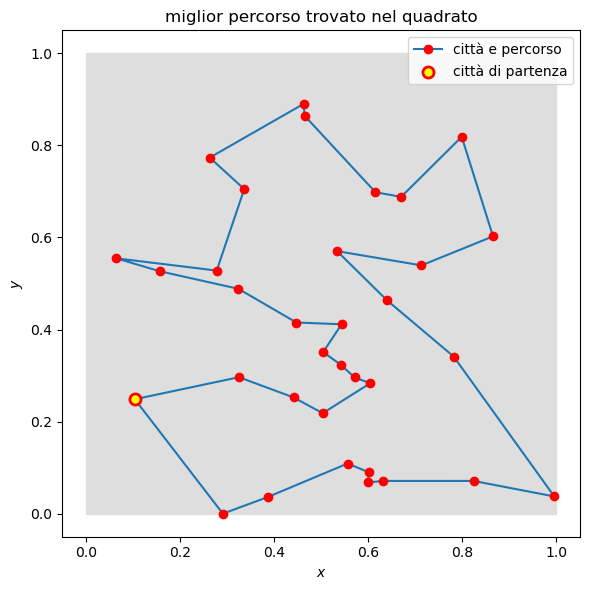

In [9]:
# draw picture of the cities in the square

x, y = importPositions("code/square/positions.out")
cities, nCities = importCities("code/square/best.out")

xOrder, yOrder = np.empty(nCities), np.empty(nCities)

# orders positions, based on the order of the cities
for i in range(nCities):
    xOrder[i] = x[cities[i] - 1]
    yOrder[i] = y[cities[i] - 1]

fig, ax = plt.subplots(figsize = (6, 6))

square = plt.Rectangle((0, 0), 1, 1, color = "#dedede", zorder = -1)
ax.add_patch(square)

ax.plot(xOrder, yOrder, "o-", color = "#1f77b4", mfc = "red", mec = "red", label = "città e percorso")

# segment from last city to first
ax.plot([xOrder[nCities - 1], xOrder[0]], [yOrder[nCities - 1], yOrder[0]], zorder = 0)

# make first city stand out
ax.scatter(x[0], y[0], color = "yellow", ec = "red", s = 64, linewidths = 2, zorder = 4, label = "città di partenza")

ax.set(title = "miglior percorso trovato nel quadrato", xlabel = "$x$", ylabel = "$y$")

fig.tight_layout()
plt.legend()
plt.show()

Per il percorso migliore trovato L^(2) = 0.91652


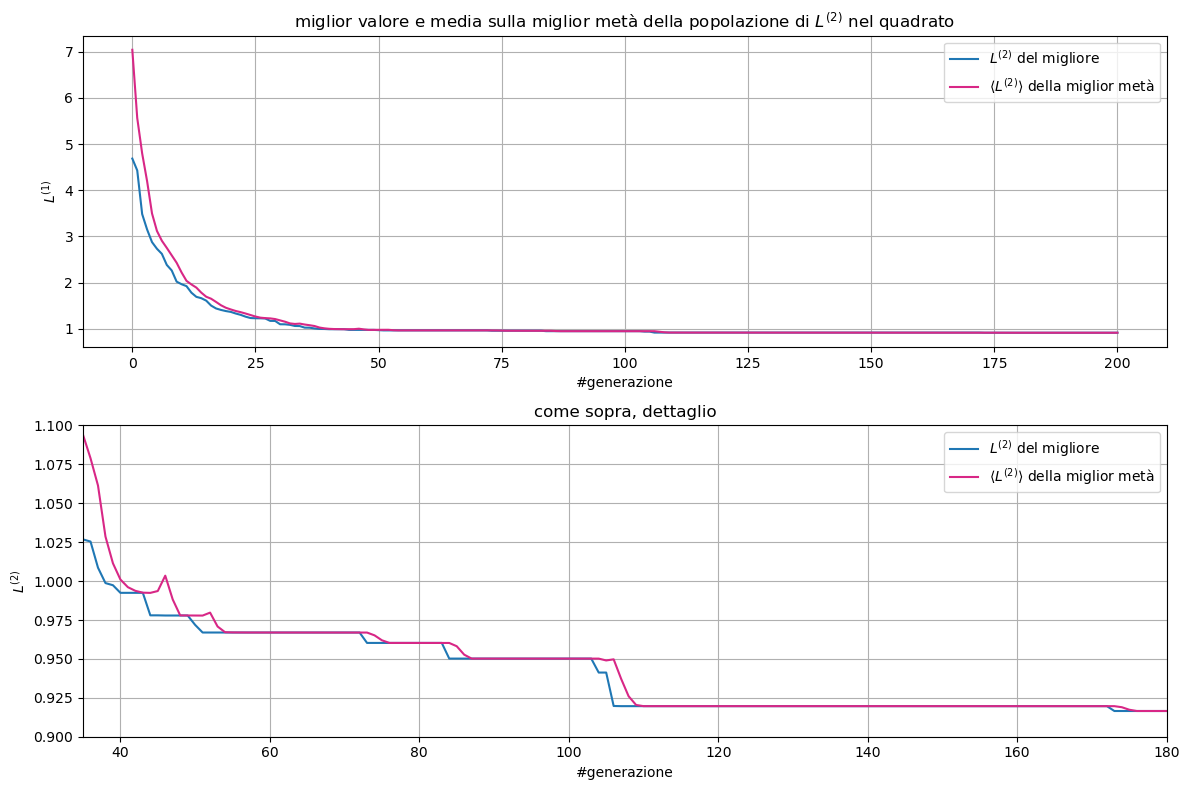

In [10]:
fig, ax = plt.subplots(2, 1, figsize = (12, 8))

# plot best value of L^2 over generations (on ax[1] is the same plot but zoomed in)
best, nGens = loadFile("code/square/path.out")
x = np.arange(nGens)

ax[0].plot(x, best, label = "$L^{(2)}$ del migliore")
ax[1].plot(x, best, label = "$L^{(2)}$ del migliore")

# plot average value of L^2 on the best half of the populazion over generations (on ax[1] is the same plot but zoomed in)
mean, nGens = loadFile("code/square/average.out")
ax[0].plot(x, mean, color = "#d82786", label = r"$\langle L^{(2)} \rangle$ della miglior metà")
ax[1].plot(x, mean, color = "#d82786", label = r"$\langle L^{(2)} \rangle$ della miglior metà")

ax[0].set(title = "miglior valore e media sulla miglior metà della popolazione di $L^{(2)}$ nel quadrato", xlabel = "#generazione", ylabel = "$L^{(1)}$")
ax[0].legend()
ax[0].grid(True)

# zoom from generation 25
ax[1].set(title = "come sopra, dettaglio", xlabel = "#generazione", ylabel = "$L^{(2)}$", xlim = (35, 180), ylim = (0.9, 1.1))
ax[1].legend()
ax[1].grid(True)

print("Per il percorso migliore trovato L^(2) = %.5f" % best[-1])


fig.tight_layout()
plt.show()

In questo caso 100 generazioni non sono sufficienti, infatti notiamo come la soluzione trovata migliori in due occasioni separate dopo questo numero di generazioni.  
Riteniamo sufficienti 200 generazioni perché, tra circa la generazione 120 e la 200 il percorso trovato migliora solo una volta e di poco. Probabilmente, se non siamo nel minimo assoluto, uscire da questo minimo relativo e trovare la soluzione effettiva sarebbe molto difficile e richiederebbe molte più generazioni rispetto alle 200 utilizzate.  

Nel caso del quadrato la convergenza è più lenta perché esistono molti percorsi di lunghezza simile, come dimostra l'ultimo grafico. Infatti la circonferenza è un sistema unidimensionale, quindi un percorso non ottimale implica che si passa da una stessa città almeno due volte. In due dimensioni esistono invece molti più percorsi "plausibili", che potrebbero essere molto diversi ma avere un valore di $L^{(2)}$ molto simile.  

In questo caso, analogamente al precedente, quando l'algoritmo trova un minimo locale di $L^{(2)}$, la media di $L^{(2)}$ sulla metà migliore della popolazione converge a questo valore entro qualche generazione.